In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import sys
np.set_printoptions(threshold=sys.maxsize)

In [2]:
# import opendatasets as od
# import pandas
 
# od.download("https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset")

In [3]:
df_1 = pd.read_csv("cardiovascular-disease-dataset/cardio_train.csv", sep=';')

In [4]:
df_1.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
df = df_1.drop('id', axis=1)

In [7]:
df['age'] = round(df['age'] / 365)

We Don't Have Null Value But We Have Unbeleiveble Values

In [8]:
df[(df['ap_hi'] > 180 ) | (df['ap_lo'] > 120)]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
101,51.0,1,167,80.0,190,90,2,1,0,1,0,0
228,48.0,2,183,98.0,160,1100,1,2,1,0,1,1
241,60.0,2,157,60.0,160,1000,2,1,0,0,0,1
260,50.0,1,150,83.0,140,800,1,1,0,0,1,1
329,64.0,1,176,63.0,160,1000,2,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
69872,60.0,1,152,56.0,160,1000,1,1,0,0,1,1
69878,58.0,2,168,95.0,160,1000,1,1,0,0,1,1
69885,61.0,2,166,78.0,170,1000,1,1,0,0,0,0
69894,46.0,1,160,70.0,200,100,1,2,0,0,1,1


In [9]:
df['ap_lo'].describe()

count    70000.000000
mean        96.630414
std        188.472530
min        -70.000000
25%         80.000000
50%         80.000000
75%         90.000000
max      11000.000000
Name: ap_lo, dtype: float64

In [10]:
df['ap_hi'].describe()

count    70000.000000
mean       128.817286
std        154.011419
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64

In [11]:
df['ap_lo']  = df['ap_lo'].apply(lambda x: (np.nan if x <= 76 else x))
df['ap_lo']  = df['ap_lo'].apply(lambda x: (np.nan if x >= 130 else x))

In [12]:
df['ap_lo'].describe()

count    55236.000000
mean        84.612753
std          7.044756
min         77.000000
25%         80.000000
50%         80.000000
75%         90.000000
max        126.000000
Name: ap_lo, dtype: float64

In [13]:
df['ap_hi']  = df['ap_hi'].apply(lambda x: (np.nan if x <= 108 else x))
df['ap_hi']  = df['ap_hi'].apply(lambda x: (np.nan if x >= 200 else x))

In [14]:
df['ap_hi'].describe()

count    65739.000000
mean       128.568536
std         15.354328
min        109.000000
25%        120.000000
50%        120.000000
75%        140.000000
max        199.000000
Name: ap_hi, dtype: float64

In [15]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110.0,80.0,1,1,0,0,1,0
1,55.0,1,156,85.0,140.0,90.0,3,1,0,0,1,1
2,52.0,1,165,64.0,130.0,NaN,3,1,0,0,0,1
3,48.0,2,169,82.0,150.0,100.0,1,1,0,0,1,1
4,48.0,1,156,56.0,NaN,NaN,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53.0,2,168,76.0,120.0,80.0,1,1,1,0,1,0
69996,62.0,1,158,126.0,140.0,90.0,2,2,0,0,1,1
69997,52.0,2,183,105.0,180.0,90.0,3,1,0,1,0,1
69998,61.0,1,163,72.0,135.0,80.0,1,2,0,0,0,1


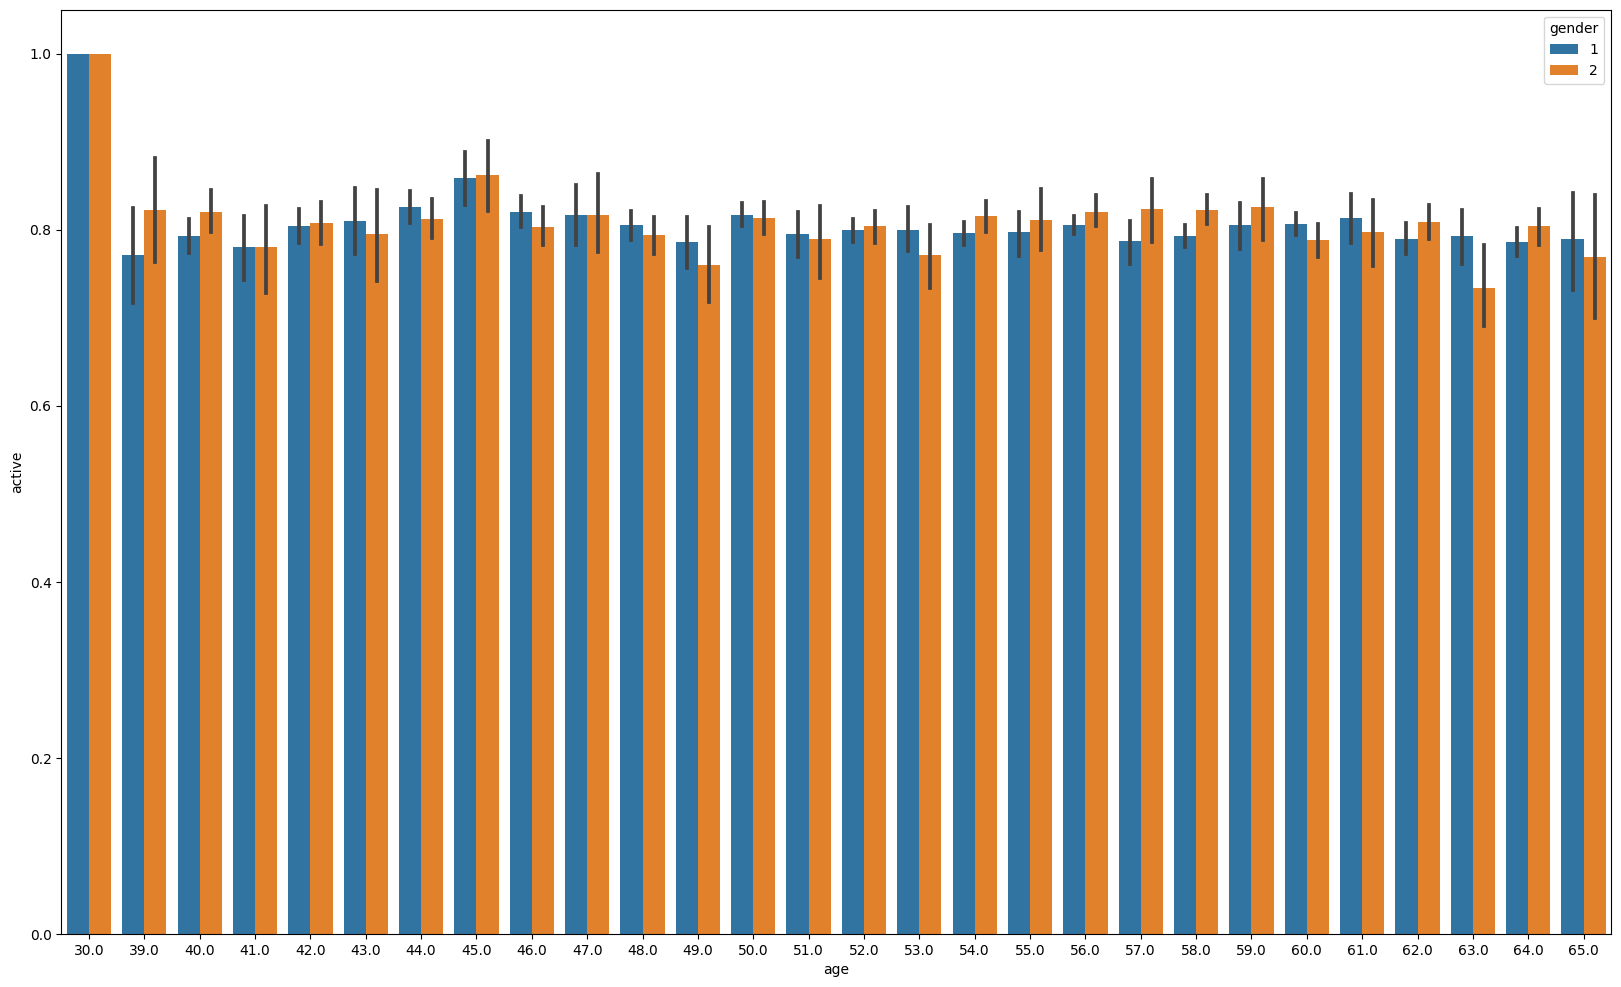

In [16]:
plt.figure(figsize=(20, 12))
sns.barplot(x = 'age', y = 'active', hue = 'gender', data = df)

In [17]:
print('1 - women CM')
print(df[df['gender'] == 1]['height'].describe())
print('----------------------------------------------------------------------------------------')
print('2 - men CM')
print(df[df['gender'] == 2]['height'].describe())

1 - women CM
count    45530.000000
mean       161.355612
std          7.052726
min         55.000000
25%        157.000000
50%        161.000000
75%        166.000000
max        250.000000
Name: height, dtype: float64
----------------------------------------------------------------------------------------
2 - men CM
count    24470.000000
mean       169.947895
std          7.228895
min         65.000000
25%        165.000000
50%        170.000000
75%        175.000000
max        207.000000
Name: height, dtype: float64


In [18]:
print('1 - women CM')
print(df[df['gender'] == 1]['height'].describe())
print('----------------------------------------------------------------------------------------')
print('2 - men CM')
print(df[df['gender'] == 2]['height'].describe())

1 - women CM
count    45530.000000
mean       161.355612
std          7.052726
min         55.000000
25%        157.000000
50%        161.000000
75%        166.000000
max        250.000000
Name: height, dtype: float64
----------------------------------------------------------------------------------------
2 - men CM
count    24470.000000
mean       169.947895
std          7.228895
min         65.000000
25%        165.000000
50%        170.000000
75%        175.000000
max        207.000000
Name: height, dtype: float64


In [19]:
df_women = df[(df['gender'] == 2)]
df_men = df[(df['gender'] == 1)]

In [20]:
#Clean Height For Both: 
df_women.loc[df_women['height'] < 150, 'height'] = np.nan
df_women.loc[df_women['height'] > 181, 'height'] = np.nan

df_men.loc[df_men['height'] < 155, 'height'] = np.nan
df_men.loc[df_men['height'] > 190, 'height'] = np.nan

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [21]:
df2 = pd.concat([df_men, df_women])
df2 = df2.sample(frac = 1) 
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 37307 to 54469
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  float64
 1   gender       70000 non-null  int64  
 2   height       62242 non-null  float64
 3   weight       70000 non-null  float64
 4   ap_hi        65739 non-null  float64
 5   ap_lo        55236 non-null  float64
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(5), int64(7)
memory usage: 6.9 MB


Using KNN imputer for null values

In [22]:
x = df2.iloc[:, :-1]
y = df2.iloc[:, -1]

In [23]:
x['cholesterol'].value_counts()
#1: normal, 2: above normal, 3: well above normal!

1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64

In [24]:
x['gluc'].value_counts()
# 1: normal, 2: above normal, 3: well above normal!

1    59479
3     5331
2     5190
Name: gluc, dtype: int64

In [25]:
x['gender'].value_counts()
# 1 - women, 2 - men

1    45530
2    24470
Name: gender, dtype: int64

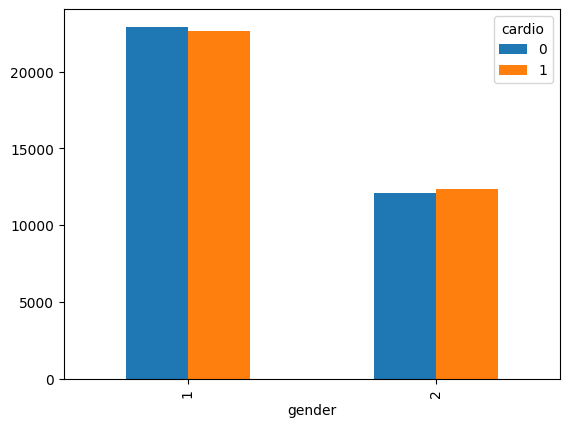

In [26]:
df2.pivot_table(index='gender', columns='cardio',values='weight' , aggfunc='count').plot(kind='bar')

In [27]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
age,70000.0,53.338686,6.765294,30.0,48.0,54.0,58.0,65.0
gender,70000.0,1.349571,0.476838,1.0,1.0,1.0,2.0,2.0
height,62242.0,165.489637,6.332410,150.0,160.0,165.0,170.0,190.0
weight,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0
ap_hi,65739.0,128.568536,15.354328,109.0,120.0,120.0,140.0,199.0
ap_lo,55236.0,84.612753,7.044756,77.0,80.0,80.0,90.0,126.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.0,1.0,2.0,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.0,1.0,1.0,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.0,0.0,0.0,1.0
alco,70000.0,0.053771,0.225568,0.0,0.0,0.0,0.0,1.0


In [28]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
x1 = imputer.fit_transform(x)
x1 = pd.DataFrame(x1, columns=x.columns)
x1.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,50.0,1.0,165.0,63.0,120.000000,80.0,1.0,1.0,0.0,0.0,1.0
1,52.0,1.0,168.0,60.0,116.666667,80.0,2.0,2.0,0.0,0.0,0.0
2,54.0,1.0,158.0,87.0,150.000000,90.0,1.0,1.0,0.0,0.0,1.0
3,44.0,1.0,160.0,100.0,120.000000,80.0,1.0,1.0,0.0,0.0,1.0
4,48.0,1.0,167.0,80.0,140.000000,90.0,1.0,1.0,0.0,0.0,1.0


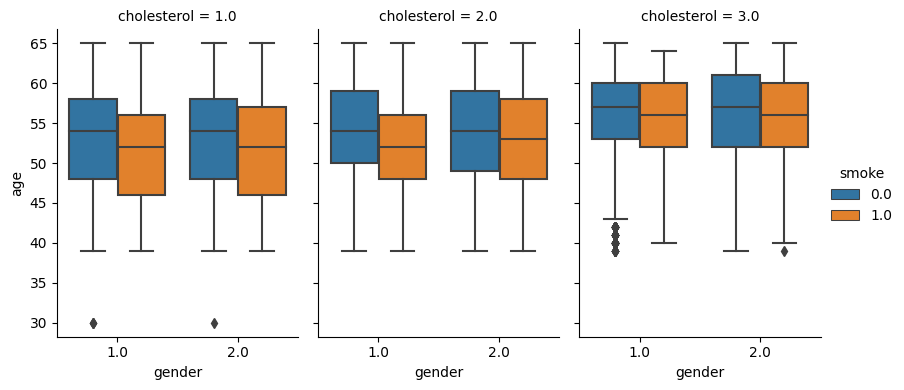

In [29]:
sns.catplot(x='gender', y='age',

                hue='smoke',col='cholesterol',

                data=x1, kind="box",

                height=4, aspect=.7);

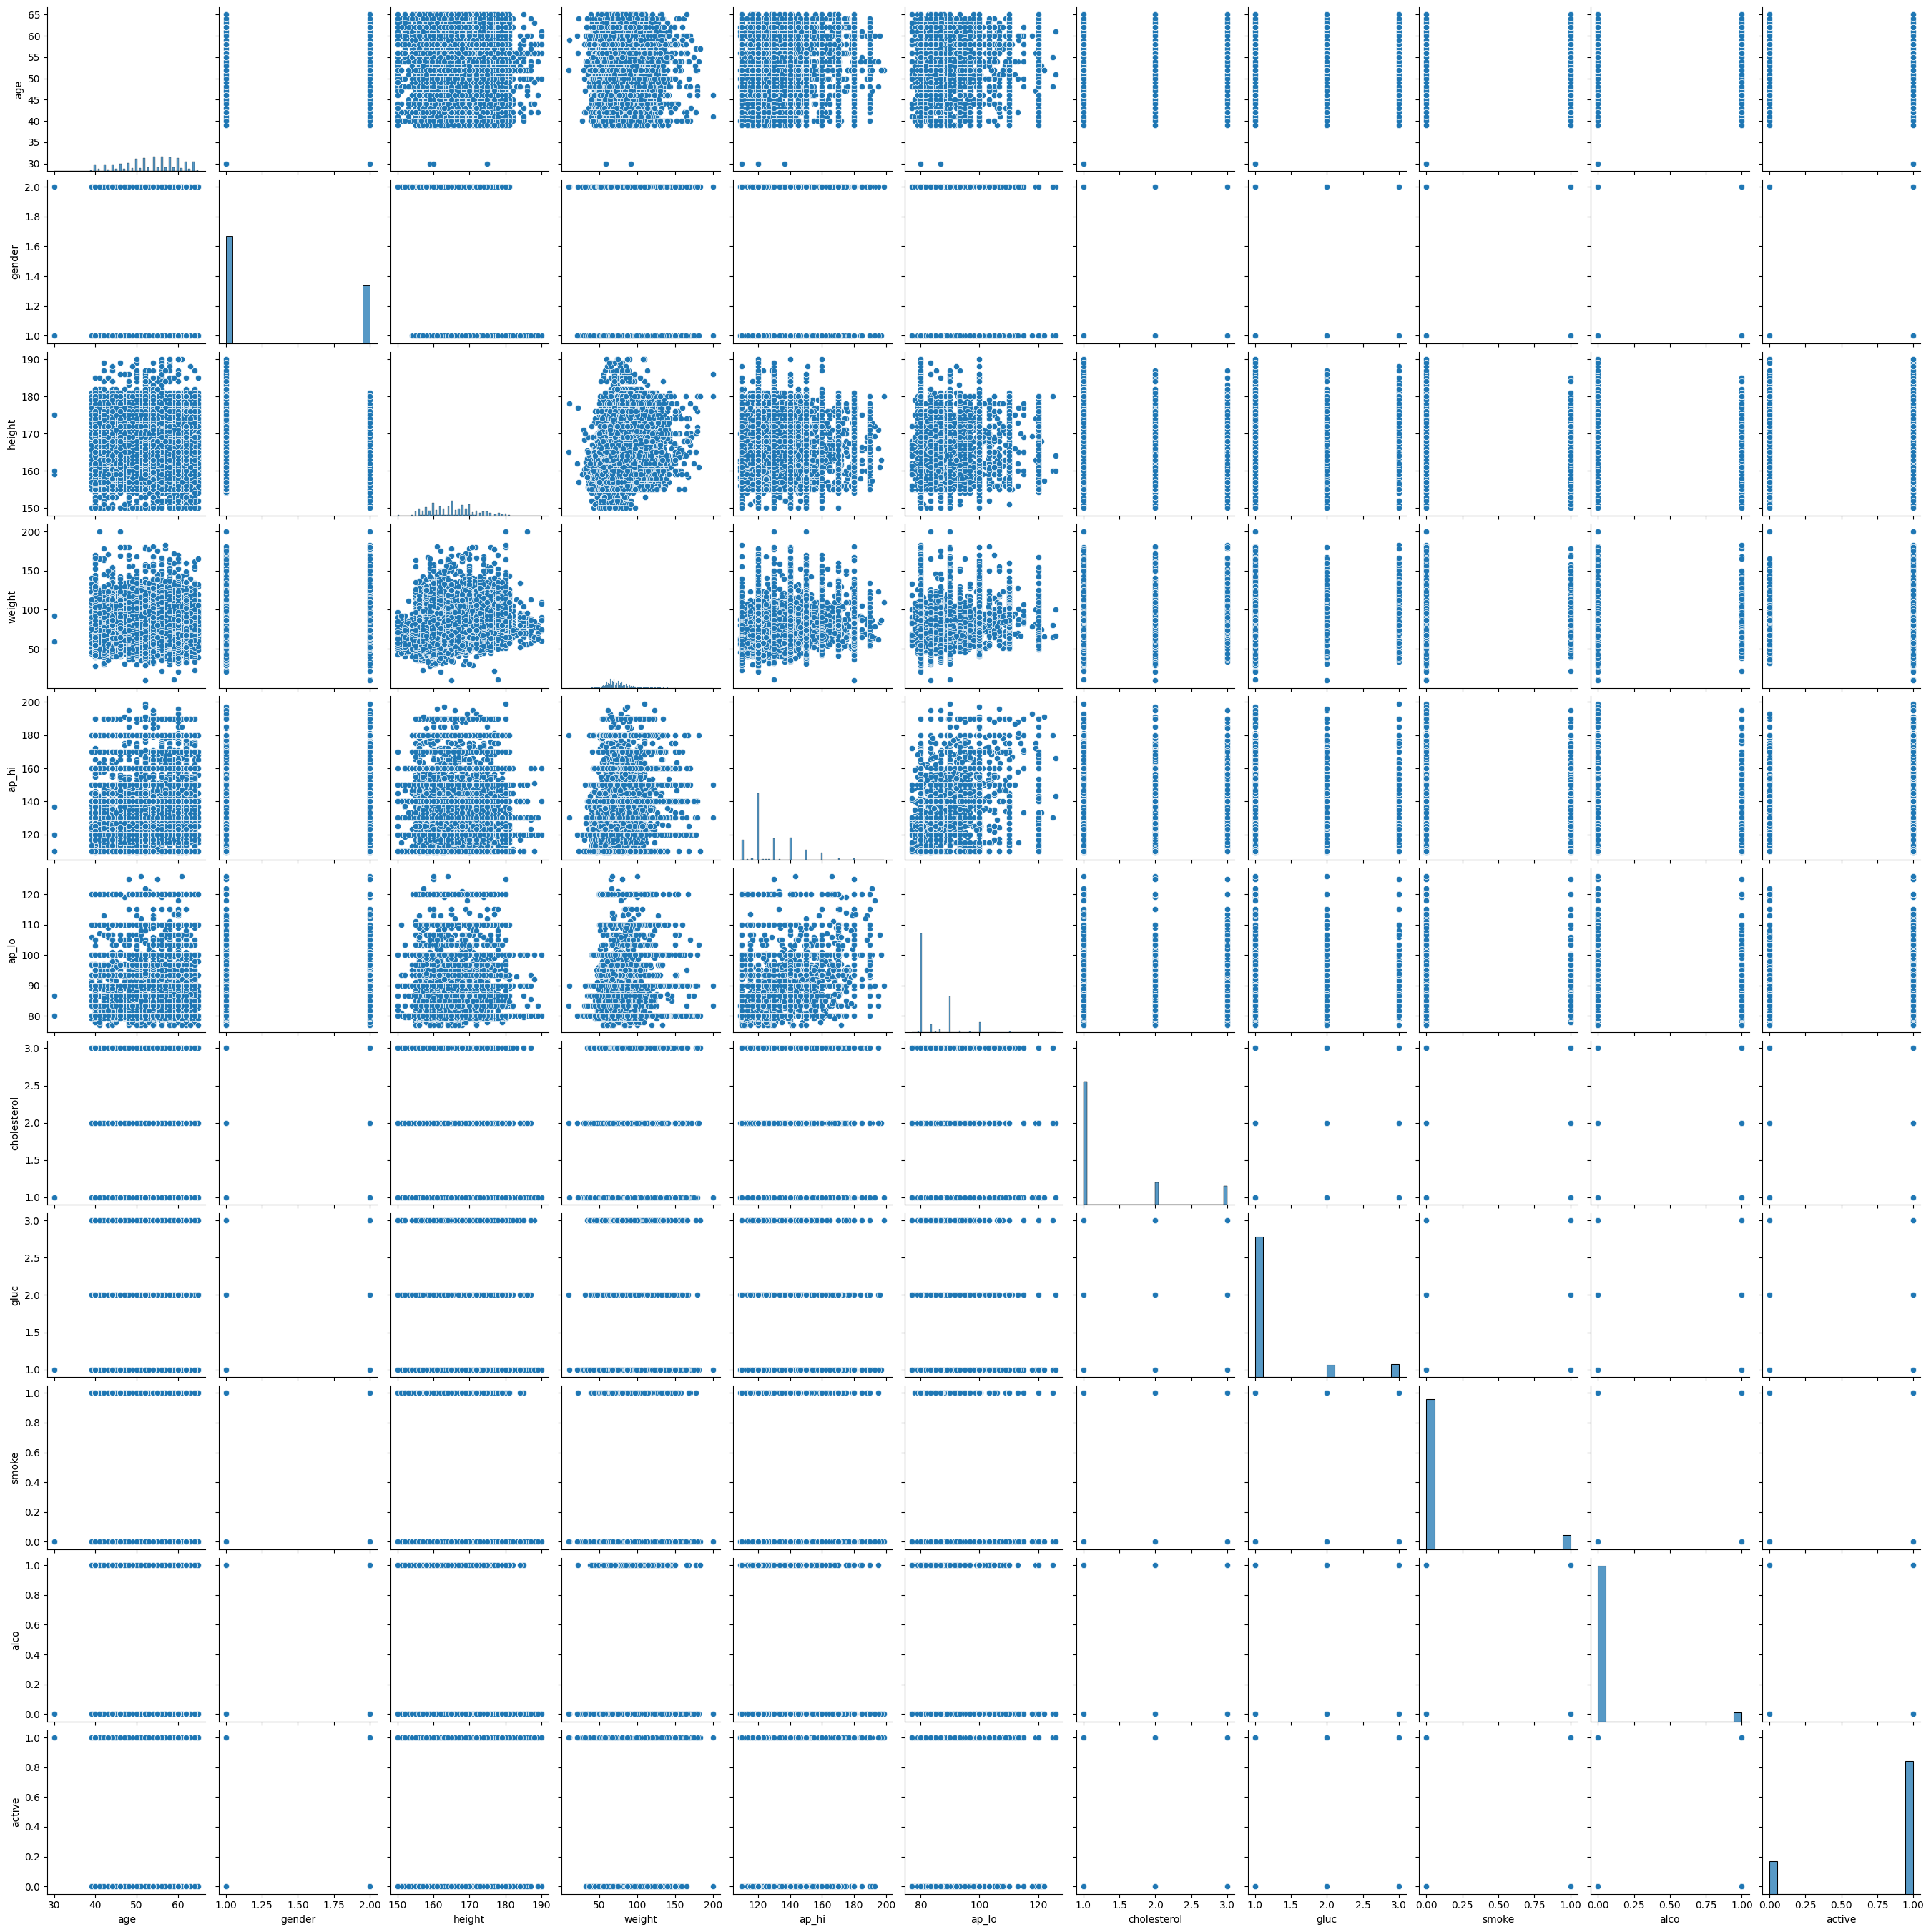

In [30]:
sns.pairplot(x1)

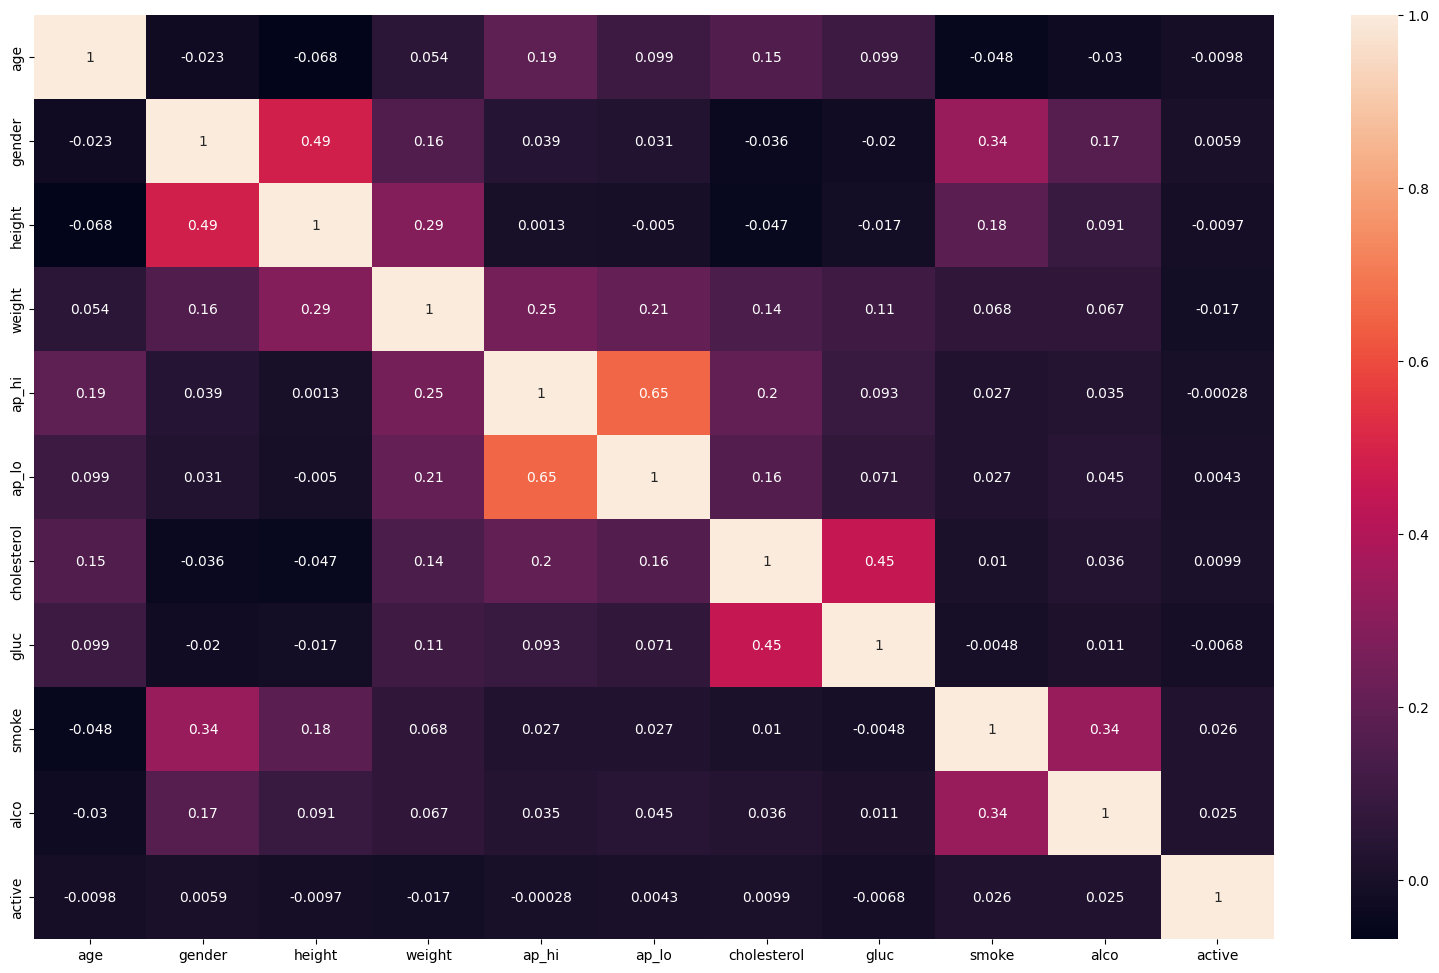

In [31]:
plt.figure(figsize=(20, 12))
sns.heatmap(x1.corr(), annot=True)

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
ct = ColumnTransformer(transformers=[('cat', MinMaxScaler(), [0, 2, 3, 4, 5])] ,remainder='passthrough', n_jobs=-1)
x2 = ct.fit_transform(x1)

In [33]:
x2 = pd.DataFrame(x2, columns=x.columns)
x2.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0.571429,0.375,0.278947,0.122222,0.061224,1.0,1.0,1.0,0.0,0.0,1.0
1,0.628571,0.450,0.263158,0.085185,0.061224,1.0,2.0,2.0,0.0,0.0,0.0
2,0.685714,0.200,0.405263,0.455556,0.265306,1.0,1.0,1.0,0.0,0.0,1.0
3,0.400000,0.250,0.473684,0.122222,0.061224,1.0,1.0,1.0,0.0,0.0,1.0
4,0.514286,0.425,0.368421,0.344444,0.265306,1.0,1.0,1.0,0.0,0.0,1.0


In [34]:
# Convert columns 5 to 10 to object dtype
x2.iloc[:, 5:11] = x2.iloc[:, 5:11].astype('object')

# Convert object dtype columns to category dtype
for col in x2.columns:
    if x2[col].dtype == 'object':
        x2[col] = x2[col].astype('category')

x3 = pd.get_dummies(x2)
x3

,age,gender,height,weight,ap_hi,ap_lo_1.0,ap_lo_2.0,cholesterol_1.0,cholesterol_2.0,cholesterol_3.0,gluc_1.0,gluc_2.0,gluc_3.0,smoke_0.0,smoke_1.0,alco_0.0,alco_1.0,active_0.0,active_1.0
0,0.571429,0.375,0.278947,0.122222,0.061224,1,0,1,0,0,1,0,0,1,0,1,0,0,1
1,0.628571,0.450,0.263158,0.085185,0.061224,1,0,0,1,0,0,1,0,1,0,1,0,1,0
2,0.685714,0.200,0.405263,0.455556,0.265306,1,0,1,0,0,1,0,0,1,0,1,0,0,1
3,0.400000,0.250,0.473684,0.122222,0.061224,1,0,1,0,0,1,0,0,1,0,1,0,0,1
4,0.514286,0.425,0.368421,0.344444,0.265306,1,0,1,0,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.914286,0.375,0.305263,0.344444,0.061224,1,0,1,0,0,1,0,0,1,0,1,0,1,0
69996,0.457143,0.300,0.352632,0.233333,0.061224,1,0,1,0,0,1,0,0,1,0,1,0,1,0
69997,0.800000,0.200,0.300000,0.344444,0.061224,1,0,1,0,0,1,0,0,0,1,1,0,0,1
69998,0.800000,0.275,0.242105,0.011111,0.129252,1,0,1,0,0,1,0,0,1,0,0,1,1,0


In [35]:
from sklearn.preprocessing import OneHotEncoder
#On All Data
enc = OneHotEncoder()
enc.fit(x2)  
x3 = enc.transform(x2).toarray()

ct_categorical = ColumnTransformer(transformers=[('cat', OneHotEncoder(), [1, 6, 7, 8, 9, 10])] ,remainder='passthrough', n_jobs=-1)
x3 = ct_categorical.fit_transform(x2)

In [36]:
x3.shape

(70000, 109)

In [37]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x3, y, test_size=0.3, random_state=1)

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

class PSO:
    def __init__(self, n_particles, dimensions, max_iter, c1, c2, X_train, y_train):
        self.n_particles = n_particles
        self.dimensions = dimensions
        self.max_iter = max_iter
        self.c1 = c1
        self.c2 = c2
        self.X_train = X_train
        self.y_train = y_train
        self.w = 0.9  # Initial inertia weight

        self.best_fitness_history = []
        self.particles_positions_history = []  # Store positions for each iteration

        self.particles = np.random.rand(n_particles, dimensions)
        self.velocities = np.random.rand(n_particles, dimensions)
        self.pbest = np.zeros((n_particles, dimensions))
        self.gbest = np.zeros(dimensions)
        self.best_fitness = float('-inf')

        # Defining the neural network model
        self.model = self.create_model()

    def create_model(self):
        model = Sequential()
        model.add(Dense(445, input_dim=self.X_train.shape[1], activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
        return model

    def update_velocity(self):
        for i in range(self.n_particles):
            r1, r2 = random.random(), random.random()
            cognitive_component = self.c1 * r1 * (self.pbest[i] - self.particles[i])
            social_component = self.c2 * r2 * (self.gbest - self.particles[i])
            inertia = self.w * self.velocities[i]
            self.velocities[i] = inertia + cognitive_component + social_component

    def update_position(self):
        for i in range(self.n_particles):
            self.particles[i] += self.velocities[i]
            fitness = self.fitness(self.particles[i])
            
            # Update personal best
            if fitness > self.fitness(self.pbest[i]):
                self.pbest[i] = self.particles[i]

            # Update global best
            if fitness > self.best_fitness:
                self.gbest = self.particles[i]
                self.best_fitness = fitness

        # Store current positions
        self.particles_positions_history.append(np.copy(self.particles))

    def optimize(self):
        for iteration in range(self.max_iter):
            self.update_velocity()
            self.update_position()
            self.decay_inertia_weight(iteration)
            self.best_fitness_history.append(self.best_fitness)
            if self.check_stagnation():
                self.restart_particles()

        return self.gbest

    def decay_inertia_weight(self, iteration):
        self.w = 0.9 - (iteration / self.max_iter) * (0.5)  # Linear decay from 0.9 to 0.4

    def check_stagnation(self):
        if len(self.best_fitness_history) > 10 and np.std(self.best_fitness_history[-10:]) < 1e-4:
            return True
        return False

    def restart_particles(self):
        self.particles = np.random.rand(self.n_particles, self.dimensions)
        self.velocities = np.random.rand(self.n_particles, self.dimensions)

    def fitness(self, particle):
        # Reshape the particle array to match the shape of the weights for each layer
        shapes = [w.shape for w in self.model.get_weights()]
        weights = []
        start_idx = 0
        for shape in shapes:
            size = np.prod(shape)
            weights.append(particle[start_idx:start_idx+size].reshape(shape))
            start_idx += size

        # Set the weights for each layer
        self.model.set_weights(weights)

        # Calculate the fitness using your metric
        y_pred = np.round(self.model.predict(self.X_train)).astype(int)
        cm = confusion_matrix(self.y_train, y_pred)
        return np.sum(cm.diagonal()) / np.sum(cm)


    def plot_performance(self):
        plt.figure(figsize=(10, 5))
        plt.plot(self.best_fitness_history)
        plt.title('PSO Performance Over Iterations')
        plt.xlabel('Iteration')
        plt.ylabel('Best Fitness')
        plt.show()
    
    def plot_animation(self):
        import matplotlib.pyplot as plt
        from matplotlib.animation import FuncAnimation
        import numpy as np

        fig, ax = plt.subplots(figsize=(10, 6))
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        scat = ax.scatter([], [], s=50)

        def init():
            scat.set_offsets([])
            return scat,

        def update(frame):
            positions = self.particles_positions_history[frame]
            if positions.shape[1] != 2:
                raise ValueError("The number of dimensions must be exactly 2 for 2D visualization.")
            scat.set_offsets(positions)
            return scat,

        animation = FuncAnimation(fig, update, init_func=init, frames=len(self.particles_positions_history), interval=200, blit=True, repeat=True)

        plt.show()
        # Save the animation as a GIF using Pillow
        animation.save('pso_animation.gif', writer='pillow', fps=5)

        plt.close(fig)  # Close the figure to prevent display when running the script




2024-04-27 02:45:11.830975: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-27 02:45:14.042303: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-27 02:45:14.690089: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-04-27 02:45:14.690123: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [39]:
import time

start_ts = time.time()

pso = PSO(n_particles=30, dimensions=111 * 445 + 445 + 445 + 1, max_iter=20, c1=1.5, c2=2.0, X_train=x_train, y_train=y_train)

end_ts = time.time()

best_weights = pso.optimize()


2024-04-27 02:45:33.105534: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-04-27 02:45:33.105592: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (shreyaskr20001): /proc/driver/nvidia/version does not exist
2024-04-27 02:45:33.114508: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1532/1532 [==============================] - 2s 1ms/step


In [40]:
print(f"Time Taken to train [s]: {(end_ts-start_ts):.3f}")

Time Taken to train [s]: 8.488


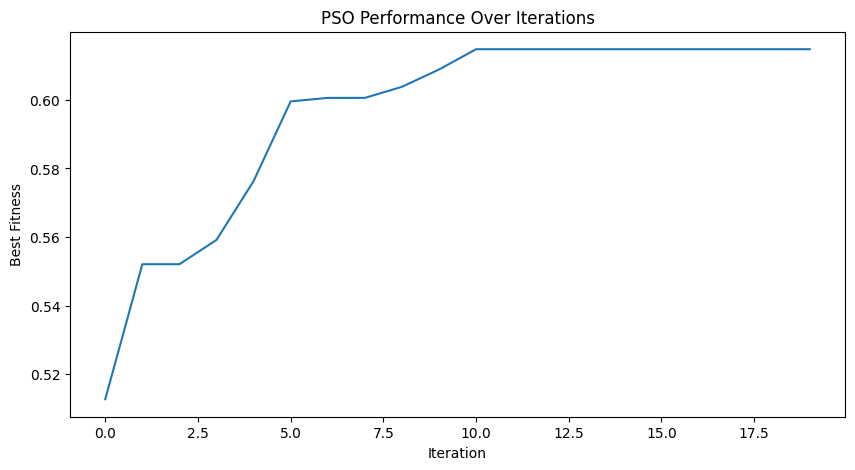

In [41]:
pso.plot_performance()

In [42]:
testModel = Sequential()
testModel.add(Dense(445, input_dim=x_train.shape[1], activation='relu'))
testModel.add(Dense(1, activation='sigmoid'))
testModel.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [43]:
shapes = [w.shape for w in testModel.get_weights()]
weights = []
start_idx = 0
for shape in shapes:
    size = np.prod(shape)
    weights.append(best_weights[start_idx:start_idx+size].reshape(shape))
    start_idx += size

# Set the weights for each layer
testModel.set_weights(weights)

In [44]:
# Calculate the fitness using your metric
y_pred = np.round(testModel.predict(x_train)).astype(int)
cm = confusion_matrix(y_train, y_pred)
print("Train Dataset: \n", cm)
train_accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
print("Train accuracy: ", train_accuracy)

1532/1532 [==============================] - 2s 1ms/step
Train Dataset: 
 [[15088  9477]
 [ 9698 14737]]
Train accuracy:  0.6086734693877551


In [45]:
# Calculate the fitness using your metric
y_pred = np.round(testModel.predict(x_test)).astype(int)
cm = confusion_matrix(y_test, y_pred)
print("Test Dataset: \n", cm)
test_accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
print("Test accuracy: ", test_accuracy)

657/657 [==============================] - 1s 1ms/step
Test Dataset: 
 [[6359 4097]
 [4223 6321]]
Test accuracy:  0.6038095238095238


In [54]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

class PSO:
    def __init__(self, n_particles, dimensions, max_iter, c1, c2, X_train, y_train):
        self.n_particles = n_particles
        self.dimensions = dimensions
        self.max_iter = max_iter
        self.c1 = c1
        self.c2 = c2
        self.X_train = X_train
        self.y_train = y_train
        self.w = 0.9  # Constant inertia weight

        self.best_fitness_history = []
        self.particles_positions_history = []  # Store positions for each iteration

        self.particles = np.random.rand(n_particles, dimensions)
        self.velocities = np.random.rand(n_particles, dimensions)
        self.pbest = np.zeros((n_particles, dimensions))
        self.gbest = np.zeros(dimensions)
        self.best_fitness = float('-inf')

        # Defining the neural network model
        self.model = self.create_model()

    def create_model(self):
        model = Sequential()
        model.add(Dense(445, input_dim=self.X_train.shape[1], activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
        return model

    def update_velocity(self):
        for i in range(self.n_particles):
            r1, r2 = random.random(), random.random()
            cognitive_component = self.c1 * r1 * (self.pbest[i] - self.particles[i])
            social_component = self.c2 * r2 * (self.gbest - self.particles[i])
            inertia = self.w * self.velocities[i]
            self.velocities[i] = inertia + cognitive_component + social_component

    def update_position(self):
        for i in range(self.n_particles):
            self.particles[i] += self.velocities[i]
            fitness = self.fitness(self.particles[i])
            
            # Update personal best
            if fitness > self.fitness(self.pbest[i]):
                self.pbest[i] = self.particles[i]

            # Update global best
            if fitness > self.best_fitness:
                self.gbest = self.particles[i]
                self.best_fitness = fitness

        # Store current positions
        self.particles_positions_history.append(np.copy(self.particles))

    def optimize(self):
        for iteration in range(self.max_iter):
            self.update_velocity()
            self.update_position()
            self.best_fitness_history.append(self.best_fitness)

        return self.gbest

    def fitness(self, particle):
        # Reshape the particle array to match the shape of the weights for each layer
        shapes = [w.shape for w in self.model.get_weights()]
        weights = []
        start_idx = 0
        for shape in shapes:
            size = np.prod(shape)
            weights.append(particle[start_idx:start_idx+size].reshape(shape))
            start_idx += size

        # Set the weights for each layer
        self.model.set_weights(weights)

        # Calculate the fitness using your metric
        y_pred = np.round(self.model.predict(self.X_train)).astype(int)
        cm = confusion_matrix(self.y_train, y_pred)
        return np.sum(cm.diagonal()) / np.sum(cm)

    def plot_performance(self):
        plt.figure(figsize=(10, 5))
        plt.plot(self.best_fitness_history)
        plt.title('PSO Performance Over Iterations')
        plt.xlabel('Iteration')
        plt.ylabel('Best Fitness')
        plt.show()
    
    def plot_animation(self):
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        scat = ax.scatter([], [], s=50)

        def init():
            scat.set_offsets


In [55]:
import time

start_ts = time.time()

Tpso = TraditionalPSO(n_particles=30, dimensions=111 * 445 + 445 + 445 + 1, max_iter=20, c1=1.5, c2=2.0, X_train=x_train, y_train=y_train)

end_ts = time.time()

best_weights1 = Tpso.optimize()

1532/1532 [==============================] - 2s 1ms/step


In [56]:
print(f"Time Taken to train [s]: {(end_ts-start_ts):.3f}")

Time Taken to train [s]: 0.045


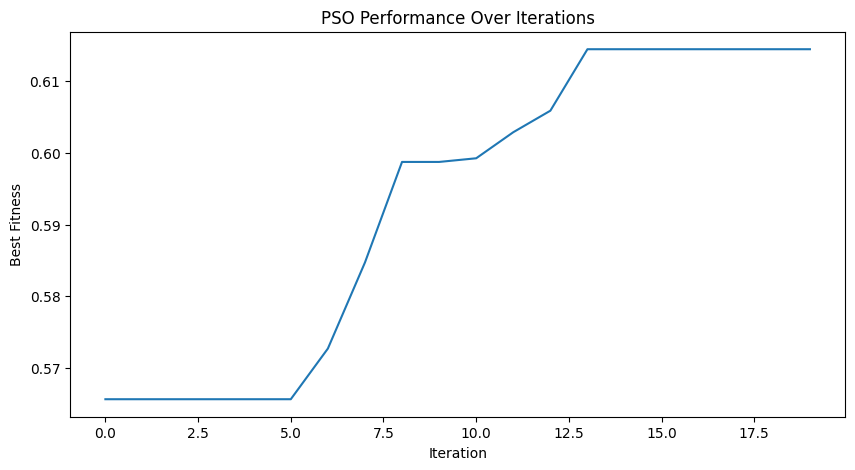

In [57]:
Tpso.plot_performance()

In [58]:
testModel1 = Sequential()
testModel1.add(Dense(445, input_dim=x_train.shape[1], activation='relu'))
testModel1.add(Dense(1, activation='sigmoid'))
testModel1.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [59]:
shapes = [w.shape for w in testModel1.get_weights()]
weights = []
start_idx = 0
for shape in shapes:
    size = np.prod(shape)
    weights.append(best_weights1[start_idx:start_idx+size].reshape(shape))
    start_idx += size

# Set the weights for each layer
testModel1.set_weights(weights)

In [60]:
# Calculate the fitness using your metric
y_pred1 = np.round(testModel1.predict(x_train)).astype(int)
cm = confusion_matrix(y_train, y_pred1)
print("Train Dataset: \n", cm)
train_accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
print("Train accuracy: ", train_accuracy)

1532/1532 [==============================] - 2s 1ms/step
Train Dataset: 
 [[ 8456 16109]
 [ 4801 19634]]
Train accuracy:  0.573265306122449


In [61]:
# Calculate the fitness using your metric
y_pred1 = np.round(testModel1.predict(x_test)).astype(int)
cm = confusion_matrix(y_test, y_pred1)
print("Test Dataset: \n", cm)
test_accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
print("Test accuracy: ", test_accuracy)

657/657 [==============================] - 1s 1ms/step
Test Dataset: 
 [[3454 7002]
 [2043 8501]]
Test accuracy:  0.5692857142857143
